# Lab Session 1

Note: 

text that looks like this is instructions to you

```text that looks like this is code which you can copy and paste directly into a code cell```


Welcome to the lab session! Each lab takes the form of a Jupyter notebook. When you open the lab up you will typically see a mix of instructions (like this) and some pre-existing code cells to get you started. Make sure you run all the code cells which already exist, and then you can go through the worksheet, writing solutions into blank code cells as you go. A lot of the time in these early sessions you'll simply be copy/pasting code and pressing run...but don't worry, it will get more complicated :-)

In this lab, there are two code cells already in the file, which we have just discussed in class. The first imports a few new libraries into Python, and the second downloads an example dataset from the statsmodels data library (really this is from the R data library!). If you don’t have an internet connection, I have also placed the file in the file distribution folder. You can import it by uncommenting the code at the bottom of the second cell. Ask an instructor if you aren’t sure how to do this 

There are lots of sample datasets available through statsmodels. These are good for testing things out quickly (though I wouldn’t necessarily recommend them for your assignment). You can find out more about them here: https://www.statsmodels.org/dev/datasets/index.html


In [1]:
%matplotlib inline
import statsmodels as sm
import pandas as pd

In [2]:
#dataset on extra marital affairs. see: https://www.statsmodels.org/dev/datasets/generated/fair.html
data = sm.datasets.get_rdataset('Fair', 'Ecdat')
#nb: this will only work if you have an internet connection!
#if it doesn't, uncomment and run the following code (you will have to comment out the line above)
import pickle
data = pickle.load(open('Fair.p', 'rb'))
df = pd.DataFrame(data.data)

Have a look at the documentation for the dataset, which can be found here https://www.statsmodels.org/dev/datasets/generated/fair.html

The documentation tells you the dataset concerns the number of extra-marital affairs individuals have had. It was collected in the US in the 1970s. The documentation also tells you (amongst other things) that there should be 6,366 observations in the dataset, which in this case are individuals, and 9 variables, which are measured characteritics of these individuals.

Let’s check we actually got what we were expecting. We can describe the ‘shape’ of the dataset using: `df.shape`. Copy and paste `df.shape` into the code cell below and hit run. You should get a ‘tuple’ (a pair of values) as a result. This shows you how many observations and variables there are in the dataset. 


In [3]:
df.shape

(601, 9)

In fact, we got a lot less than we were expecting! The dataset is clearly only a subset of the full data. Now let’s have a look at some of the data. `df.head()` tells pandas to print out the top 5 rows of the dataframe. You should see a table with 5 rows and 9 columns (plus an index column). This is a useful way of getting a quick sanity check that the dataframe contains what you are expecting

In [4]:
df.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


One of the first things we want to do in any analysis is check summary statistics of our variables. Let’s start with the age variable:
- `df['age'].mean()`

In [5]:
df['age'].mean()

32.48752079866888

We can see the average age is just over 32. Let’s also get the standard deviation, min and max values
- `df['age'].std()`
- `df['age'].min()`
- `df['age'].max()`

Note that if you put all these commands in the same code cell you will need to wrap them in `print()` statements to get all the output on screen: something like `print(df['age'].std())`

In [6]:
print (df['age'].std())
print (df['age'].min())
print (df['age'].max())

9.28876170487667
17.5
57.0


What about how the variable is distributed? Let’s produce a histogram: `df.hist('age')`

We can see there are more people in the younger end of the histogram than the older end. This might indicate a selection bias in the way people were chosen for the survey (to really know whether this is the case, we would also need to know the distribution of marriage ages for all US couples in the 1970s)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x81c6322b0>]],
      dtype=object)

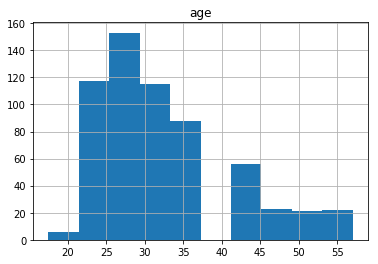

In [7]:
df.hist('age')

At the beginning of any analysis we should perform this descriptive procedure for all variables of interest. Pandas makes it easy to collect all the statistics for all variables in a dataset, with: `df.describe()`

In [8]:
df.describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


We can also produce histograms for all data using `df.hist()`
- If the image is too small, you could adjust it with something like `df.hist(figsize=(10,10))`
- Nb. A lot of text is produced before the histograms. You can suppress this type of output using a semi-colon, i.e by using `df.hist(figsize=(10,10));`

Have a look through all the summary statistics and graphics for all the variables. Are there any other distributions which look strange to you? Make a note and discuss with a neighbor

The summary statistics and graphics only contain seven variables. Which ones are missing? Why?

In [10]:
df.describe(include='all')

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
count,601,601.000000,601.000000,601,601.000000,601.000000,601.000000,601.000000,601.000000
unique,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,female,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
freq,315,NaN,NaN,430,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.487521,8.177696,NaN,3.116473,16.166389,4.194676,3.931780,1.455907
std,NaN,9.288762,5.571303,NaN,1.167509,2.402555,1.819443,1.103179,3.298758
min,NaN,17.500000,0.125000,NaN,1.000000,9.000000,1.000000,1.000000,0.000000
25%,NaN,27.000000,4.000000,NaN,2.000000,14.000000,3.000000,3.000000,0.000000
50%,NaN,32.000000,7.000000,NaN,3.000000,16.000000,5.000000,4.000000,0.000000
75%,NaN,37.000000,15.000000,NaN,4.000000,18.000000,6.000000,5.000000,0.000000


Let’s now produce some summaries for the two missing variables.

Let’s break down the gender variable first:
`df['sex'].value_counts()` will give us the frequency of observations in each category

We can also use `df['sex'].value_counts(normalize=True)` to get percentages 

In [11]:
df['sex'].value_counts(normalize=True)

female    0.524126
male      0.475874
Name: sex, dtype: float64

The result of `.value_counts()` is a table. We can also capture that information and make it into a plot, using something like the following: 

`gender_breakdown = df['sex'].value_counts()`

`gender_breakdown.plot.bar()`

nb. Unlike the histogram, the bar plot doesn’t really give us any new insight into the data that the frequencies already gave us. Nevertheless, they can still be useful as a means of presenting data. 

Perform the breakdown above for the children variable. How many of the individuals in the dataset have children?

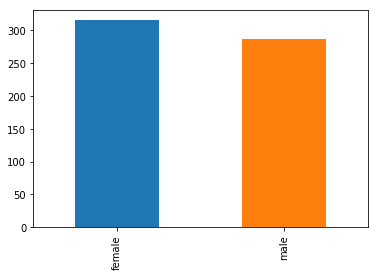

In [12]:
gender_breakdown = df['sex'].value_counts()

gender_breakdown.plot.bar()